

# **Assignment 2 : Graph Representation in Memory**

In this assignment you can use the [Networkx](https://networkx.org/documentation/stable/tutorial.html) functions whenever possible. 


*(a usedul cheat sheet can be found [here](https://cheatography.com/murenei/cheat-sheets/network-analysis-with-python-and-networkx/)).*


**Problem 1:** (60 points)

Given the following undirected graph G(E,V), please answer the questions:

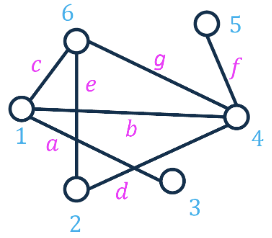





**Question 1:** Given the code template of the toy graph below, complete the template so that it matchs G(E,V) defined in Problem 1 above.

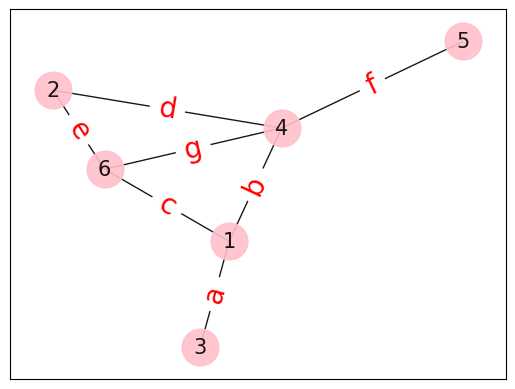

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = [['1','3'],['1','6'],['1','4'],['2','4'],['2','6'],['4','5'],['4','6']]
G = nx.Graph()
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,edge_color='black',width=1,linewidths=1,\
        node_size=700,node_color='pink',alpha=0.9,\
        labels={node:node for node in G.nodes()}, font_size=15)

nx.draw_networkx_edge_labels(G,pos,font_color='red',edge_labels={('1','3'):'a',\
        ('1','6'):'c',('1','4'):'b',('2','4'):'d',('2','6'):'e',('4','5'):'f',('4','6'):'g'}, font_size=20)
plt.show() 

**Question 2:** Find is the shortest path between nodes 5 and 3 in graph G(E,V)

In [84]:
print("The shortest path between nodes 5 and 3 is as follow:")
shortest_path = nx.shortest_path(G, source='5', target='3')
print(shortest_path)

The shortest path between nodes 5 and 3 is as follow:
['5', '4', '1', '3']


**Question 3:** Find the diameter of G(E,V).

In [85]:
print("The graph diameter is as follow:")
diameter = nx.diameter(G)
print(diameter)

The graph diameter is as follow:
3


**Question 4:** Find the degree of node 4 and node 1.

In [86]:
print("The degree of node 4 is as follow:")
degree_node_4 = G.degree('4')
print(degree_node_4)

print("The degree of node 1 is as follow:")
degree_node_1 = G.degree('1')
print(degree_node_1)

The degree of node 4 is as follow:
4
The degree of node 1 is as follow:
3


**Question 5:** Find the adjacency matrix **A** of G(E,V)?

In [87]:
print("The Adjacency Matrix is:")
A = nx.adjacency_matrix(G,nodelist=sorted(G.nodes()))
print(A.todense())

The Adjacency Matrix is:
[[0 0 1 1 0 1]
 [0 0 0 1 0 1]
 [1 0 0 0 0 0]
 [1 1 0 0 1 1]
 [0 0 0 1 0 0]
 [1 1 0 1 0 0]]


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_31696/28435936.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G,nodelist=sorted(G.nodes()))


**Question 6:** Find the degree matrix **D** of G(E,V).

In [88]:
print("The Degree Matrix is:")
node_list = sorted(G.nodes())
degrees = [G.degree(node) for node in node_list]

D = np.diag(degrees)
print(D)

The Degree Matrix is:
[[3 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 3]]


**Question 7:** Find the Laplacian matrix **L** of G(E,V).

In [89]:
print("The Laplacian Matrix is:")
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes())).todense()
print(L)

The Laplacian Matrix is:
[[ 3  0 -1 -1  0 -1]
 [ 0  2  0 -1  0 -1]
 [-1  0  1  0  0  0]
 [-1 -1  0  4 -1 -1]
 [ 0  0  0 -1  1  0]
 [-1 -1  0 -1  0  3]]


**Question 8:** Find the Incidence matrix **C** of G(E,V).

In [94]:
print("The Incidence Matrix is:")
C = nx.incidence_matrix(G, nodelist=sorted(G.nodes())).todense()
print(C)

The Incidence Matrix is:
[[1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0.]]


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_31696/1446963066.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  C = nx.incidence_matrix(G, nodelist=sorted(G.nodes())).todense()


**Question 9:** Show the relationship between **A**, **D**, and **C**.

In [95]:
print("The Relationship betwen A, D and L is:")

L_ = D - A
print("L = D - A")
print(L_)

C = nx.incidence_matrix(G, nodelist=sorted(G.nodes()), oriented=True).todense()
print("\n\nThe Relationship betwen A, D and C is:")
C_T = np.transpose(C)

CTC = np.dot(C,C_T)

print("C^T * C:")
print(CTC)
print("\nLaplacian matrix L:")
print(L)

The Relationship betwen A, D and L is:
L = D - A
[[ 3  0 -1 -1  0 -1]
 [ 0  2  0 -1  0 -1]
 [-1  0  1  0  0  0]
 [-1 -1  0  4 -1 -1]
 [ 0  0  0 -1  1  0]
 [-1 -1  0 -1  0  3]]


The Relationship betwen A, D and C is:
C^T * C:
[[ 3.  0. -1. -1.  0. -1.]
 [ 0.  2.  0. -1.  0. -1.]
 [-1.  0.  1.  0.  0.  0.]
 [-1. -1.  0.  4. -1. -1.]
 [ 0.  0.  0. -1.  1.  0.]
 [-1. -1.  0. -1.  0.  3.]]

Laplacian matrix L:
[[ 3  0 -1 -1  0 -1]
 [ 0  2  0 -1  0 -1]
 [-1  0  1  0  0  0]
 [-1 -1  0  4 -1 -1]
 [ 0  0  0 -1  1  0]
 [-1 -1  0 -1  0  3]]


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_31696/1684262670.py:7: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  C = nx.incidence_matrix(G, nodelist=sorted(G.nodes()), oriented=True).todense()


Regarding the adjacency matrix \(A\) and the degree matrix \(D\), the Laplacian matrix \(L\) is defined by the equation \(L = D - A\). This matrix provides insights into the graph's connectivity. It essentially quantifies the difference between the number of direct links a node possesses (its degree) and its connections to other nodes (its adjacency).

When considering \(A\), \(D\), and the incidence matrix \(C\), it's noted that \(A\) and \(D\) have a direct relationship through the Laplacian matrix \(L\), whereas \(C\) relates in a more indirect manner. Specifically, \(C\) itself does not directly merge with \(A\) or \(D\) to create another conventional matrix. Instead, it offers an alternate perspective on the graph's structure. For undirected graphs, squaring the elements of \(C\) can produce a matrix with diagonal values matching the nodes' degrees, thereby linking it back to \(D\). Furthermore, the product \(C^T dot C\), with \(C^T\) being the transpose of \(C\), yields a matrix deeply connected to the Laplacian matrix, encapsulating elements from both \(D\) and \(A\).



**Problem 2:** (40 points)

Given the following directed graph G2(E,V), please answer the questions below.

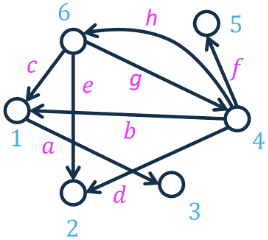


**Question 1:** Given the code template of the toy graph below, complete the template so that it matchs G2(E,V) defined in Problem 2 above.

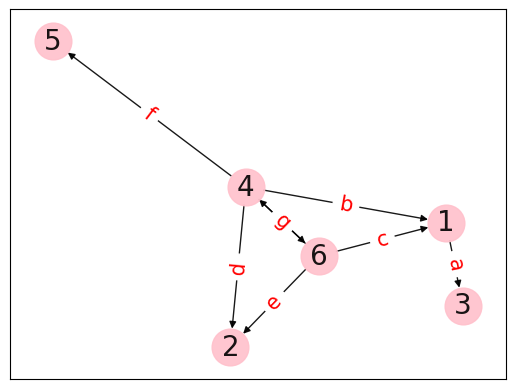

In [74]:
edges = [['1','3'],['6','1'],['4','1'],['4','2'],['6','2'],['6','4'],['4','6'],['4','5']]
G = nx.DiGraph(directed=True)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,edge_color='black',width=1,linewidths=1,\
        node_size=700,node_color='pink',alpha=0.9,\
        labels={node:node for node in G.nodes()}, font_size=20)

nx.draw_networkx_edge_labels(G,pos,font_color='red',edge_labels={('1','3'):'a',\
        ('1','6'):'c',('1','4'):'b',('4','2'):'d',('6','2'):'e',('6','4'):'f',('4','6'):'g',('4','5'):'f'},
                             font_size=15)

plt.show() 

**Question 2:** Find the in-degree and out-degree of node 1.

In [57]:
print("The in-degree of node 1 is:")
in_degree_node_1 = G.in_degree('1')
print(in_degree_node_1)
print("The out-degree of node 1 is:")
out_degree_node_1 = G.out_degree('1')
print(out_degree_node_1)

The in-degree of node 1 is:
2
The out-degree of node 1 is:
1


**Question 3:** Check if G2(E,V) is a strongly connected graph.

In [52]:
is_strongly_connected = nx.is_strongly_connected(G)
print("Is G2 strongly connected?", is_strongly_connected)

Is G2 strongly connected? False


**Question 4:** Check if G2(E,V) is a directed acyclic graph.

In [54]:
is_dag = nx.is_directed_acyclic_graph(G)
print("Is G2 a directed acyclic graph?", is_dag)

Is G2 a directed acyclic graph? False


**Question 5:** Find G2(E,V) adjacency matrix representation.

In [75]:
print("The Adjacency Matrix is:")
A = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))
print(A.todense())

The Adjacency Matrix is:
[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 1 1]
 [0 0 0 0 0 0]
 [1 1 0 1 0 0]]


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_31696/4193675121.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))


**Question 6:** Find G2(E,V) in-degree matrix representation.

In [78]:
print("The in-dgeree Matrix is:")

in_degrees = dict(G.in_degree())

n = len(G.nodes())
D_in = np.zeros((n, n))

for i, node in enumerate(sorted(G.nodes())):
    D_in[i, i] = in_degrees[node]
print(D_in)

The in-dgeree Matrix is:
[[2. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


**Question 7:** Find G2(E,V) Laplacian matrix representation.

*Hint: Laplacian = indegree - adjacency*



In [79]:
print("The Laplacian Matrix is:")
L = D_in - A
print(L)

The Laplacian Matrix is:
[[ 2.  0. -1.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [-1. -1.  0.  1. -1. -1.]
 [ 0.  0.  0.  0.  1.  0.]
 [-1. -1.  0. -1.  0.  1.]]
